# Overview

In [2]:
import pandas as pd

df = pd.read_csv("../data/train.csv").drop('id', axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# Features analysis

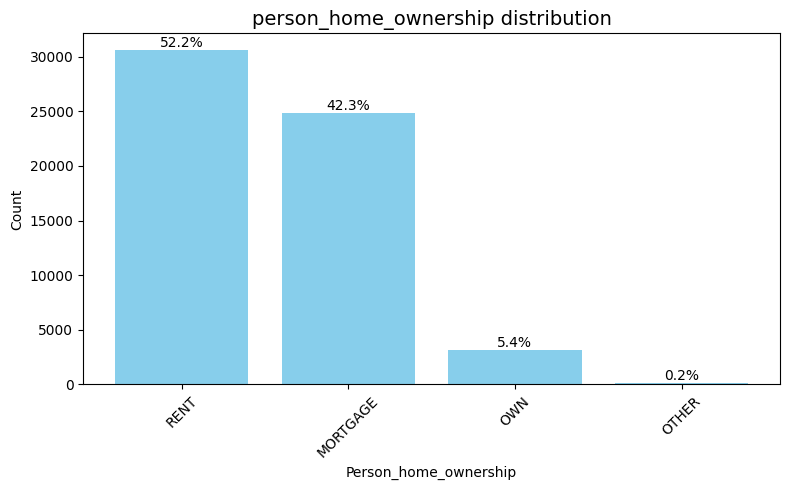

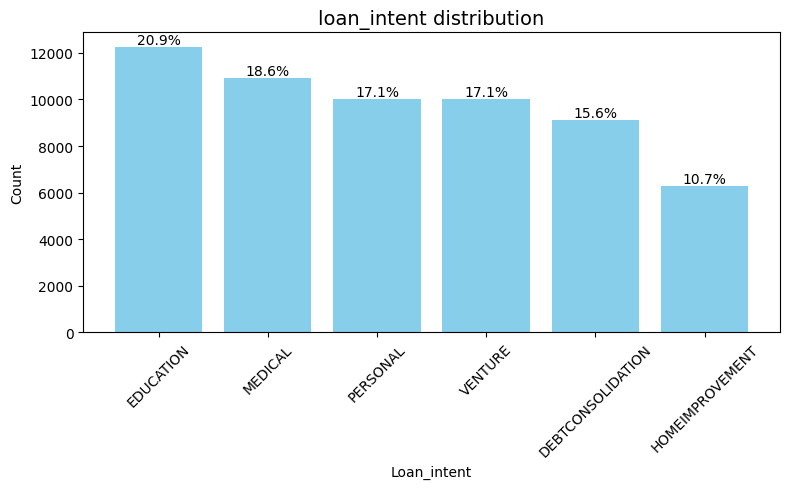

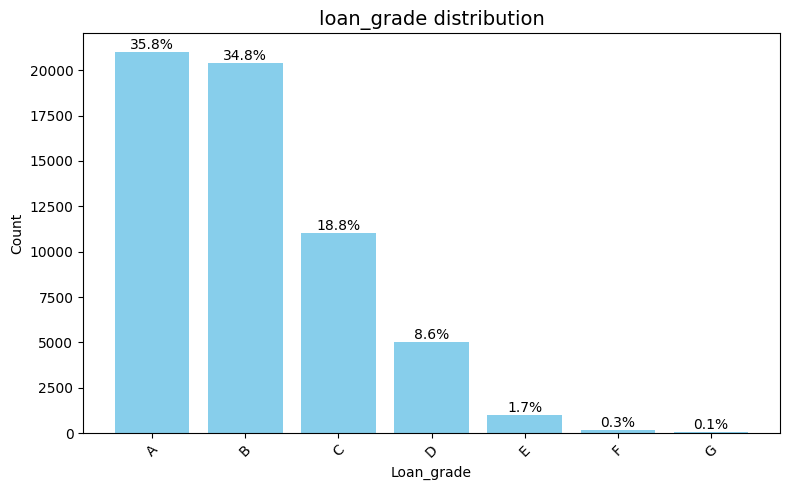

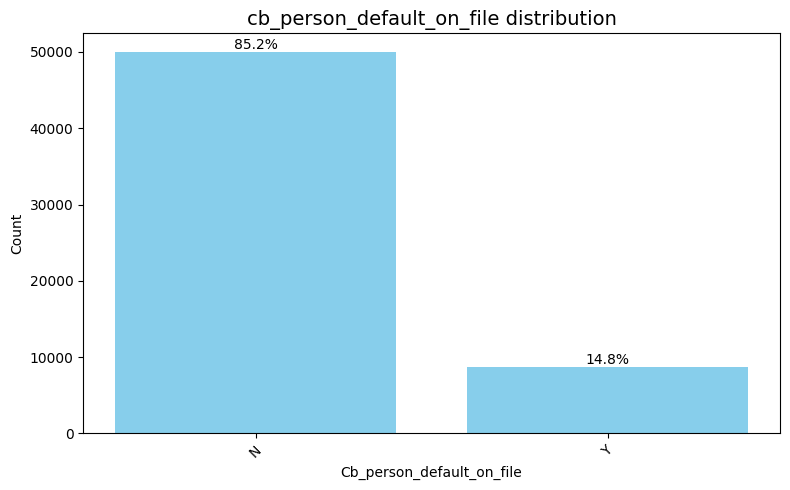

In [4]:
import matplotlib.pyplot as plt

col = 'person_home_ownership'

def plot_categorical_bar(df, column, title=None):
    """
    Plots a bar chart for a categorical column in a DataFrame,
    with percentage labels on top of each bar.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column name (categorical) to visualize.
        title (str, optional): Custom title for the chart.
    """
    counts = df[column].value_counts()
    percentages = counts / counts.sum() * 100

    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(counts.index, counts.values, color='skyblue')

    # Add percentage labels above bars
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

    ax.set_ylabel('Count')
    ax.set_title(title or f"{column} distribution", fontsize=14)
    ax.set_xlabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for col in list(df.columns):
    if df[col].dtype == object:
        plot_categorical_bar(df, col, title=None)
    


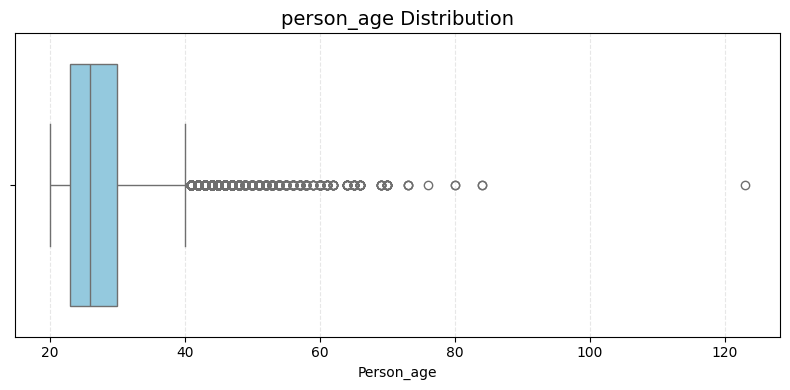

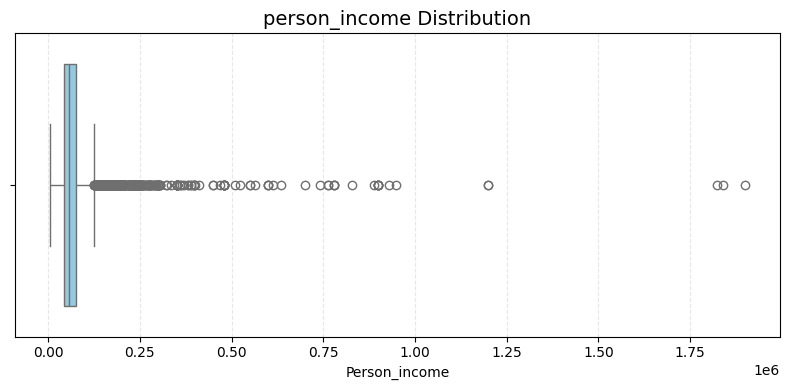

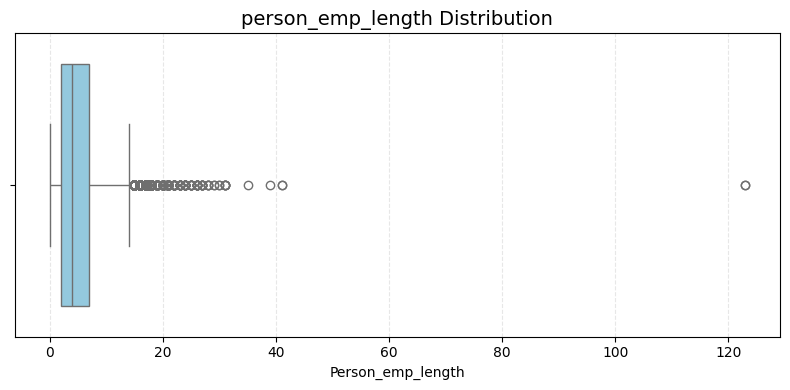

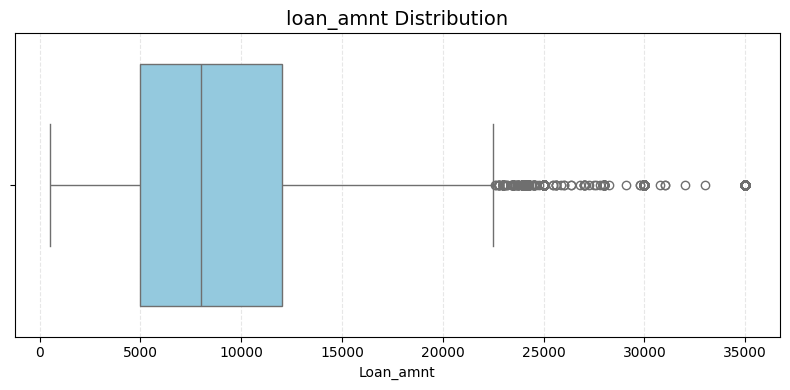

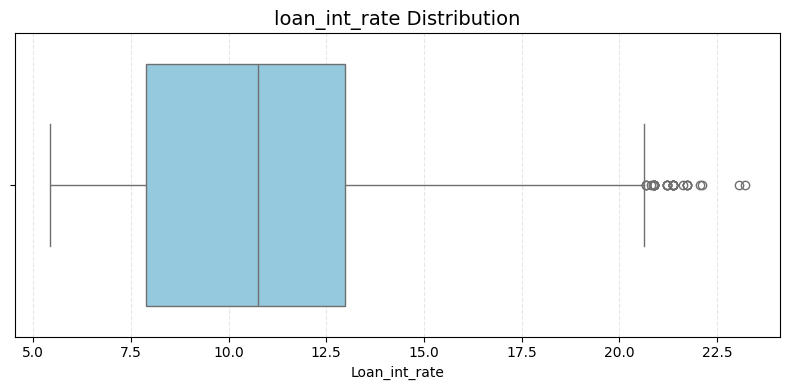

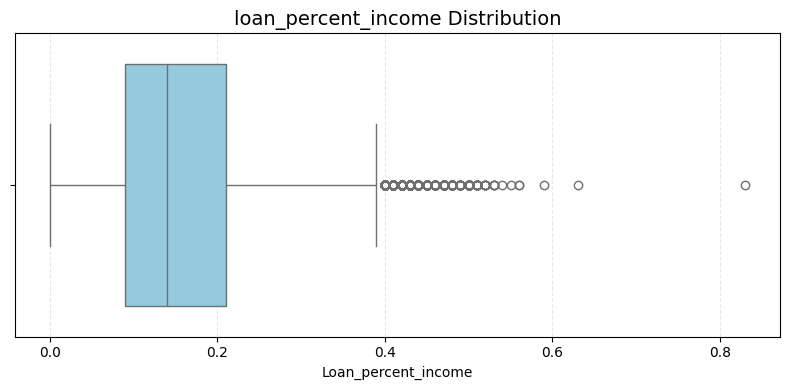

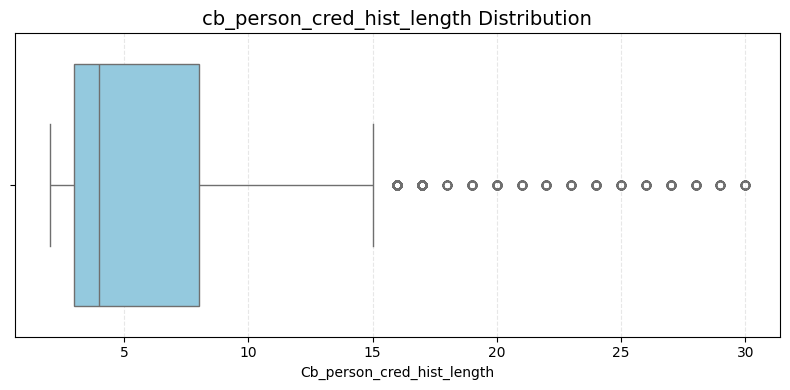

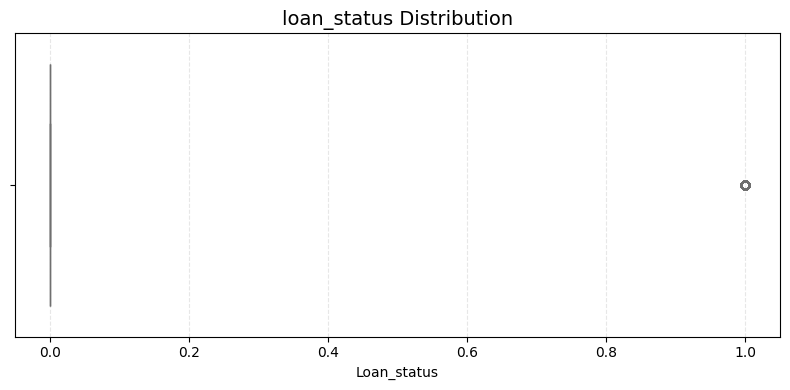

In [5]:
import seaborn as sns

def plot_numerical_boxplot(df, column, title=None):
    """
    Displays a clean boxplot for a numerical column in a DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column name (numerical) to visualize.
        title (str, optional): Title for the plot.
    """
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"Column '{column}' must be numerical.")
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='skyblue')
    
    plt.title(title or f"{column} Distribution", fontsize=14)
    plt.xlabel(column.capitalize())
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

for col in list(df.columns):
    if df[col].dtype != object:
        plot_numerical_boxplot(df, col, title=None)

# Correlation map

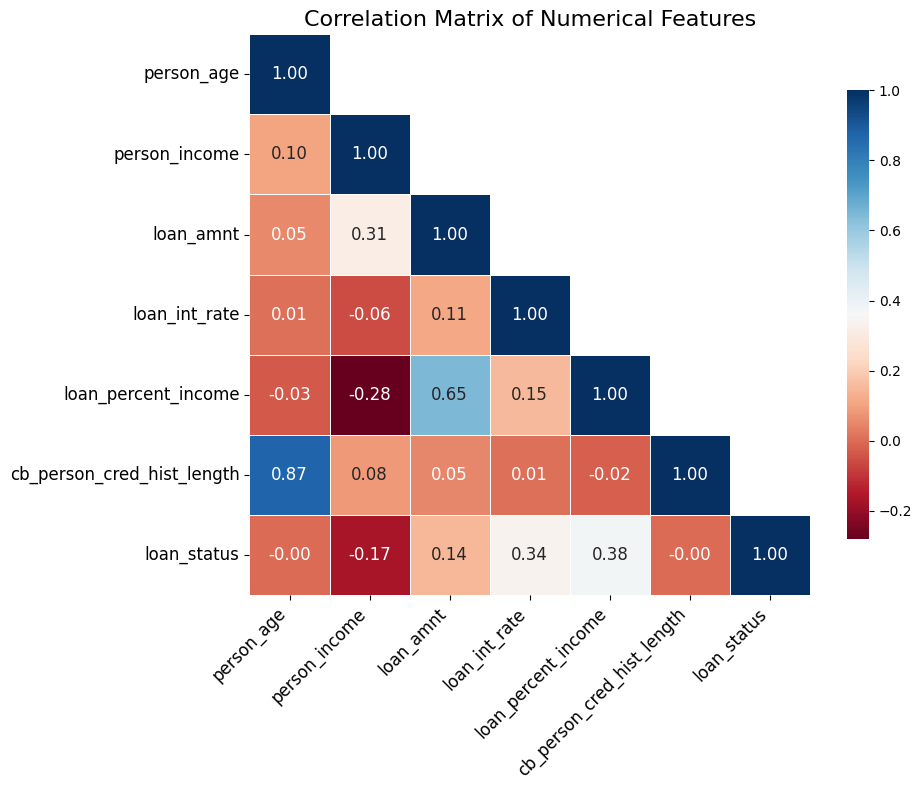

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create correlation matrix
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
                      'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
corr_matrix = df[numerical_features].corr()

# Create a mask to only show lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), 1)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap="RdBu", 
            square=True,
            linewidths=0.5,
            annot_kws={"size": 12},
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



